# Oscillation Equations

Check non-dimensionalization of Le Bihan & Burrows 2013

In [1]:
import sympy as sp
from IPython.display import display
sp.init_printing()

D = sp.Derivative
G, cs2, r, w2, N2 = sp.symbols(r'G c_s^2 r omega^2 N^2', nonzero=True)
llp1 = sp.symbols('l(l+1)')
xr_f, dP_f, dPhi_f, ddPhi_f, g_r, rho0_r = sp.symbols(
    r"\xi_r P \Phi \Phi' g \rho_0", cls=sp.Function, nonzero=True)
xr = xr_f(r)
dP = dP_f(r)
dPhi = dPhi_f(r)
ddPhi = ddPhi_f(r)
g = g_r(r)
rho0 = rho0_r(r)
y1, y2, y3, y4 = sp.symbols(r"y_1 y_2 y_3 y_4", cls=sp.Function, nonzero=True)

In [2]:
expr1 = (
    1 / r**2 * D(r**2 * xr, r)
    - g * xr / cs2
    + (1 - (llp1 * cs2) / (r**2 * w2)) * dP / (cs2 * rho0)
    - llp1 / (r**2 * w2) * dPhi
)
expr2 = (
    1 / rho0 * D(dP, r)
    + D(dPhi, r)
    + g / (rho0 * cs2) * dP
    + (N2 - w2) * xr
)
expr3 = D(dPhi, r) - ddPhi
expr4 = (
    1 / r**2 * D(r**2 * ddPhi, r)
    - llp1 / r**2 * dPhi
    - 4 * sp.pi * G * rho0 * (
        dP / (rho0 * cs2)
        + xr * N2 / g
    )
)

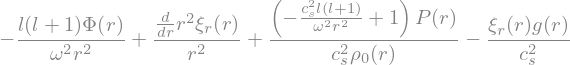

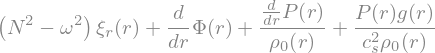

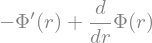

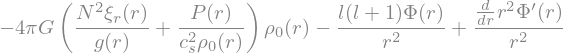

In [3]:
display(expr1)
display(expr2)
display(expr3)
display(expr4)

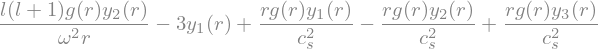

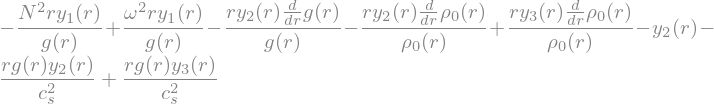

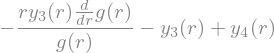

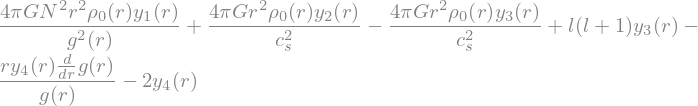

In [4]:
sub_dict = {
    xr: y1(r) * r,
    dPhi: y3(r) * g * r,
    ddPhi: y4(r) * g,
    dP: g * r * (y2(r) - y3(r)) * rho0,
}
y1p = sp.simplify(r * D(y1(r), r)
                  - sp.simplify(expr1.subs(sub_dict)))
y2p = sp.simplify(r * D(y2(r), r)
                  - sp.simplify(expr2.subs(sub_dict) / g))
y3p = sp.simplify(r * D(y3(r), r)
                  - sp.simplify(expr3.subs(sub_dict) / g))
y4p = sp.simplify(r * D(y4(r), r)
                  - sp.simplify(expr4.subs(sub_dict) * r / g))
display(y1p)
display(y2p)
display(y3p)
display(y4p)

In [5]:
Vg, U, c1, wbar2, As, Mr, R, M = sp.symbols(r'V_g U c_1 \bar{\omega}^2 A^* M_r R M')
# NB: Mr is technically a function, but should be fine

def process_expr(y):
    # the ordering may be somewhat important if we want to keep things simple
    expsimp = lambda y: sp.expand(sp.simplify(y))
    y = expsimp(y).subs({
         D(rho0, r) * r / rho0:
            (N2 / g**2 + 1 / cs2) * (-g * r),
    })
    y = expsimp(y).subs({
        g * r / cs2: Vg,
        N2 * r / g: As,
        D(g, r):
            4 * sp.pi * G * rho0 - 2 * g / r,
    })
    y = expsimp(y).subs({
        g: G * Mr / r**2
    })
    y = expsimp(y).subs({
        4 * sp.pi * rho0 * r**3 / Mr: U,
        w2: wbar2 * G * M / R**3,
    })
    y = expsimp(y).subs({
        r**3 * M / (Mr * R**3): c1,
        R**3 * Mr / (M * r**3): 1 / c1,
        4 * sp.pi * G * rho0 * r**2 / cs2: U * Vg
    })
    return sp.expand(sp.simplify(y))

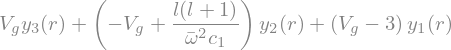

In [6]:
def my_display(y):
    y1coeff = sp.simplify(y.subs({y2(r):0, y3(r):0, y4(r):0}) / y1(r))
    y2coeff = sp.simplify(y.subs({y1(r):0, y3(r):0, y4(r):0}) / y2(r))
    y3coeff = sp.simplify(y.subs({y1(r):0, y2(r):0, y4(r):0}) / y3(r))
    y4coeff = sp.simplify(y.subs({y1(r):0, y2(r):0, y3(r):0}) / y4(r))
    display(y1coeff * y1(r)
            + y2coeff * y2(r)
            + y3coeff * y3(r)
            + y4coeff * y4(r))
    
my_display(process_expr(y1p))
my_display(process_expr(y2p))
my_display(process_expr(y3p))
my_display(process_expr(y4p))